In [3]:
#importing dependencies
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [136]:
# simple untrained model
import gymnasium as gym
env = gym.make('FrozenLake-v1', render_mode="human")
observation, info = env.reset(seed=42)
for _ in range(10):
   action = env.action_space.sample()  # this is where you would insert your policy
   observation, reward, terminated, truncated, info = env.step(action)

   if terminated or truncated:
      observation, info = env.reset()

env.close()

In [131]:
# Parameters
episodes = 2000
learning_rate_a = 0.1
discount_factor_g = 0.99
epsilon = 1.0
epsilon_decay_rate = 0.01
q = np.zeros((env.observation_space.n, env.action_space.n)) # init a 16 x 4 array
q.shape

(16, 4)

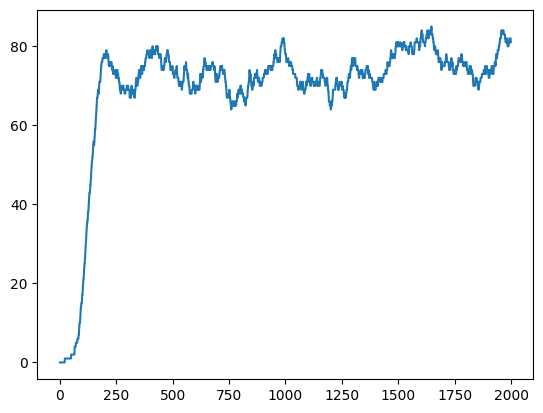

In [132]:
import os
rewards_per_episode = np.zeros(episodes)
q_table_path = 'q_table.npy'
if os.path.exists(q_table_path):
    q = np.load(q_table_path)
else:
    q = np.zeros((env.observation_space.n, env.action_space.n))
rng = np.random.default_rng()   # random number generator
env = gym.make('FrozenLake-v1')
for i in range(episodes):
        state = env.reset()[0]  
        terminated = False      
        truncated = False       

        while(not terminated and not truncated):
            if  rng.random() < epsilon:
                action = env.action_space.sample() # actions: 0=left,1=down,2=right,3=up
            else:
                action = np.argmax(q[state,:])

            new_state,reward,terminated,truncated,_ = env.step(action)

        # we use bellman equation to train our q table
            q[state,action] = q[state,action] + learning_rate_a * (
                    reward + discount_factor_g * np.max(q[new_state,:]) - q[state,action]
                )

            state = new_state
            if reward == 1:
                rewards_per_episode[i] = 1
        epsilon = max(epsilon - epsilon_decay_rate, 0)
np.save(q_table_path, q)
env.close()

sum_rewards = np.zeros(episodes)
for t in range(episodes):
    sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
plt.plot(sum_rewards)
plt.savefig('frozen_lake8x8.png')



In [139]:
#testing our model
import gymnasium as gym
env = gym.make('FrozenLake-v1', render_mode="human")
q_table_path = 'q_table.npy'
q = np.load(q_table_path)
observation, info = env.reset(seed=42)
state = env.reset()[0]
for _ in range(50):
   action = np.argmax(q[state,:])
   observation, reward, terminated, truncated, info = env.step(action)
   state=observation
   if terminated or truncated:
      env.close()
      break